In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from bs4 import BeautifulSoup
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from collections import Counter
import plotly.offline as py
import plotly.graph_objs as go

In [ ]:
df = pd.read_csv("amazon_alexa.tsv",sep='\t')
df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [ ]:
# Column names of the dataset
print(df.columns)

# First 5 rows of the dataset
print(df.head())


Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')
   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Loading the dataset
df = pd.read_csv("amazon_alexa.tsv", sep='\t')

# Checking NaN values and replace with empty string
df['verified_reviews'] = df['verified_reviews'].fillna('')

# WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
pip install afinn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53430 sha256=ad4051b69fcbc66a1e0dd3ffebda76ddc1021d4b036400be81d3eb125589f049
  Stored in directory: /root/.cache/pip/wheels/b0/05/90/43f79196199a138fb486902fceca30a2d1b5228e6d2db8eb90
Successfully built afinn


In [ ]:
from afinn import Afinn
afinn = Afinn()

# Sample
word = 'good'
sentiment_score = afinn.score(word)

# Print result
if sentiment_score > 0:
    print(f"{word} is positive with score {sentiment_score}")
elif sentiment_score < 0:
    print(f"{word} is negative with score {sentiment_score}")
else:
    print(f"{word} is neutral")



good is positive with score 3.0


In [ ]:
from afinn import Afinn


afinn = Afinn()

# Define the reduction function to root structure
def lemmatize_and_sentiment(text):
    if not isinstance(text, str):
        return 0  # If it is empty, take 0
    text = BeautifulSoup(text, "html.parser").get_text()  # Clear HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Only characters
    text = text.lower()  # All characters convert lowercase
    words = text.split()  # Split words
    stops = set(stopwords.words("english"))
    meaningful_words = [lemmatizer.lemmatize(w) for w in words if not w in stops]  # Remove stopwords and reduce to root structure
    sentiment_scores = [afinn.score(w) for w in meaningful_words]  # Calculate the emotion score of each word
    return sentiment_scores

# Reducing all comments to root structure and calculating sentiment scores
df['sentiment_scores'] = df['verified_reviews'].apply(lemmatize_and_sentiment)



<ipython-input-21-93b83b3ab796>:10: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

<ipython-input-21-93b83b3ab796>:10: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



In [ ]:
# Counting positive/negative comments
def count_sentiments(sentiment_scores):
    positive_count = sum(1 for score in sentiment_scores if score > 0)
    negative_count = sum(1 for score in sentiment_scores if score < 0)
    return positive_count, negative_count

# Calculate the number of positive and negative comments using the sentiment scores of each comment
df['positive_reviews'], df['negative_reviews'] = zip(*df['sentiment_scores'].apply(count_sentiments))


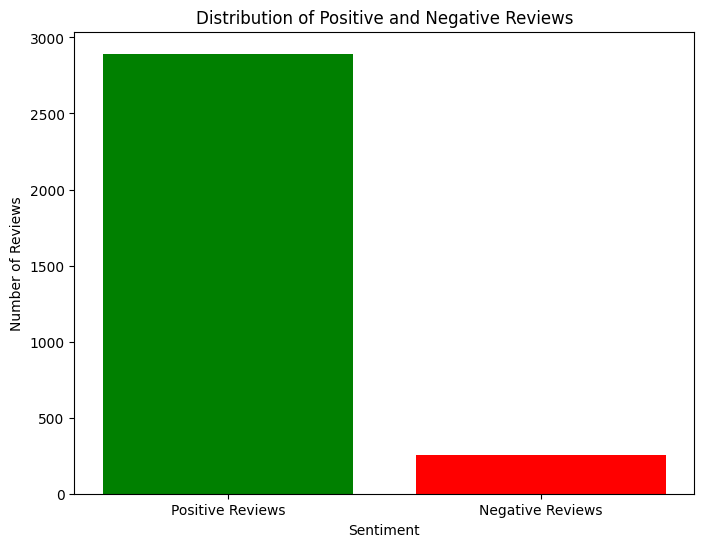

In [ ]:
import matplotlib.pyplot as plt

# Veri noktalarını alın
labels = ['Positive Reviews', 'Negative Reviews']
values = [positive_reviews, negative_reviews]

# Bar grafik oluşturun
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Positive and Negative Reviews')
plt.show()



In [ ]:
def lemmatize_text(text):
    if not isinstance(text, str):
        return ''
    text = BeautifulSoup(text, "html.parser").get_text()  # Clear HTML tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Only characters
    text = text.lower()  # Convert all characters to lowercase
    words = text.split()  # Seperate words
    stops = set(stopwords.words("english"))  # Get the English stopwords set
    meaningful_words = [lemmatizer.lemmatize(w) for w in words if not w in stops]  # Remove stopwords and reduce to root structure
    return " ".join(meaningful_words)

# Reduction of comments to root structure
df['lemmatized_review'] = df['verified_reviews'].apply(lemmatize_text)
from sklearn.model_selection import train_test_split
# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['lemmatized_review']).toarray()



<ipython-input-27-675102dda637>:4: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

<ipython-input-27-675102dda637>:4: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



In [ ]:
from collections import defaultdict

# Collecting root-reduced words used in all comments
all_words = []
for words in df['lemmatized_review']:
    all_words.extend(words.split())

# Classifying words according to emotion scores
word_sentiments = defaultdict(float)
for index, row in df.iterrows():
    sentiment_scores = lemmatize_and_sentiment(row['verified_reviews'])
    for word, score in zip(row['lemmatized_review'].split(), sentiment_scores):
        word_sentiments[word] += score

# Filter negative and positive words
negative_words = [word for word, score in word_sentiments.items() if score < 0]
positive_words = [word for word, score in word_sentiments.items() if score > 0]

# Printing negative and positive words
print("Negative Words:")
print(negative_words[:10])
print("\nPositive Words:")
print(positive_words[:10])


<ipython-input-21-93b83b3ab796>:10: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

<ipython-input-21-93b83b3ab796>:10: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



Negative Words:
['wrong', 'alarm', 'problem', 'hate', 'miss', 'difficult', 'frustrating', 'hard', 'pay', 'nervous']

Positive Words:
['love', 'loved', 'like', 'fun', 'nice', 'gift', 'accessible', 'smart', 'great', 'easy']


In [ ]:
from afinn import Afinn
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# NLTK dataset
nltk.download('stopwords')
nltk.download('wordnet')

afinn = Afinn()

# Lemmatizer
lemmatizer = WordNetLemmatizer()


def clean_and_lemmatize_text(text):
    if not isinstance(text, str):
        return ''
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    stops = set(stopwords.words("english"))
    meaningful_words = [lemmatizer.lemmatize(w) for w in words if not w in stops]
    return " ".join(meaningful_words)

# Calculating sentiment
def calculate_sentiment(text):
    cleaned_text = clean_and_lemmatize_text(text)
    sentiment_score = afinn.score(cleaned_text)
    return sentiment_score

# Cleaning comments and calculating sentiment scores
df['cleaned_review'] = df['verified_reviews'].apply(clean_and_lemmatize_text)
df['sentiment_score'] = df['verified_reviews'].apply(calculate_sentiment)


print(df[['cleaned_review', 'sentiment_score']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-31-ff8ddb3d255c>:21: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

<ipython-input-31-ff8ddb3d255c>:21: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

<ipython-input-31-ff8ddb3d255c>:21: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

<ipython-input-31-ff8ddb3d255c>:21: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an

                                      cleaned_review  sentiment_score
0                                          love echo              3.0
1                                              loved              3.0
2  sometimes playing game answer question correct...              0.0
3  lot fun thing yr old learns dinosaur control l...              9.0
4                                              music              0.0


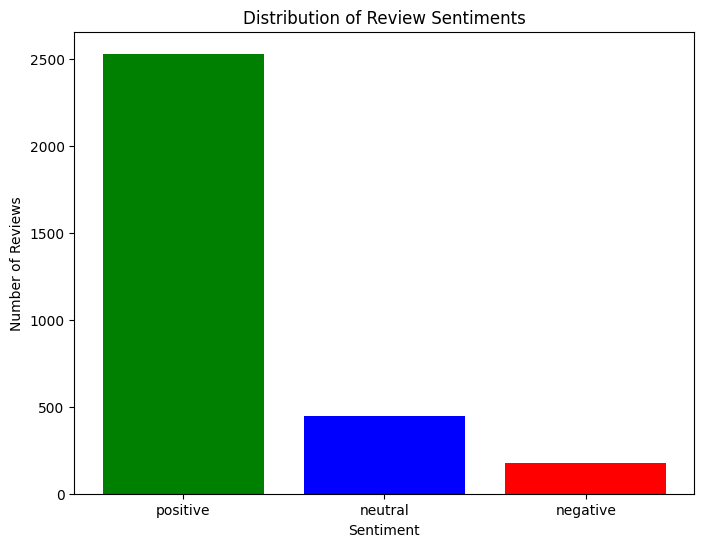

sentiment
positive    2531
neutral      445
negative     174
Name: count, dtype: int64


In [ ]:
# Determining the general mood of sentences
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

# Visualizing the overall mood distribution
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Sentiments')
plt.show()

print(sentiment_counts)



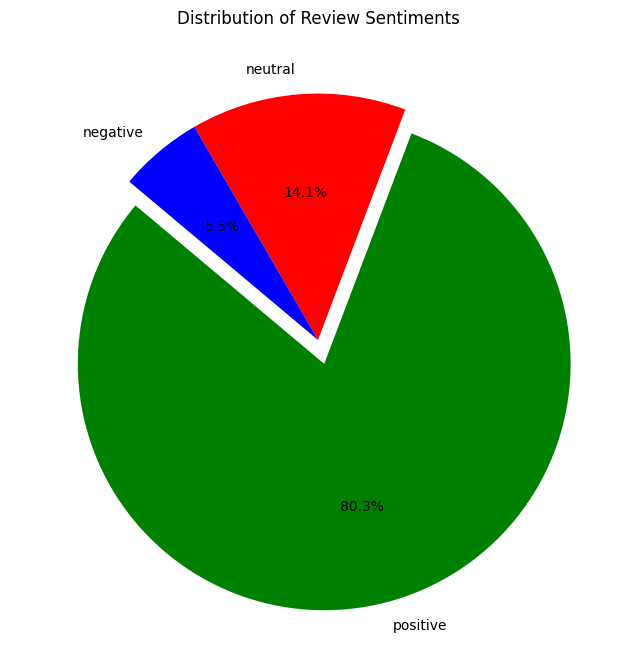

In [ ]:
# Visualizing mood distribution with a pie chart
colors = ['green', 'red', 'blue']
explode = (0.1, 0, 0)

plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=colors, explode=explode, startangle=140)
plt.title('Distribution of Review Sentiments')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from afinn import Afinn
from sklearn.model_selection import train_test_split

nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("amazon_alexa.tsv", sep='\t')
df['verified_reviews'] = df['verified_reviews'].fillna('')

print(df.head())


   rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
afinn = Afinn()
lemmatizer = WordNetLemmatizer()

def clean_and_lemmatize_text(text):
    if not isinstance(text, str):
        return ''
    text = BeautifulSoup(text, "html.parser").get_text()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = text.lower()
    words = text.split()
    stops = set(stopwords.words("english"))
    meaningful_words = [lemmatizer.lemmatize(w) for w in words if not w in stops]
    return " ".join(meaningful_words)

def calculate_sentiment(text):
    cleaned_text = clean_and_lemmatize_text(text)
    sentiment_score = afinn.score(cleaned_text)
    return sentiment_score

df['cleaned_review'] = df['verified_reviews'].apply(clean_and_lemmatize_text)
df['sentiment_score'] = df['verified_reviews'].apply(calculate_sentiment)
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

print(df[['variation', 'cleaned_review', 'sentiment_score', 'sentiment']].head())


<ipython-input-18-acdc2e6b02d0>:7: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

<ipython-input-18-acdc2e6b02d0>:7: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.

<ipython-input-18-acdc2e6b02d0>:7: MarkupResemblesLocatorWarning:

The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.

<ipython-input-18-acdc2e6b02d0>:7: MarkupResemblesLocatorWarning:

The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.



          variation                                     cleaned_review  \
0  Charcoal Fabric                                           love echo   
1  Charcoal Fabric                                               loved   
2    Walnut Finish   sometimes playing game answer question correct...   
3  Charcoal Fabric   lot fun thing yr old learns dinosaur control l...   
4  Charcoal Fabric                                               music   

   sentiment_score sentiment  
0              3.0  positive  
1              3.0  positive  
2              0.0   neutral  
3              9.0  positive  
4              0.0   neutral  


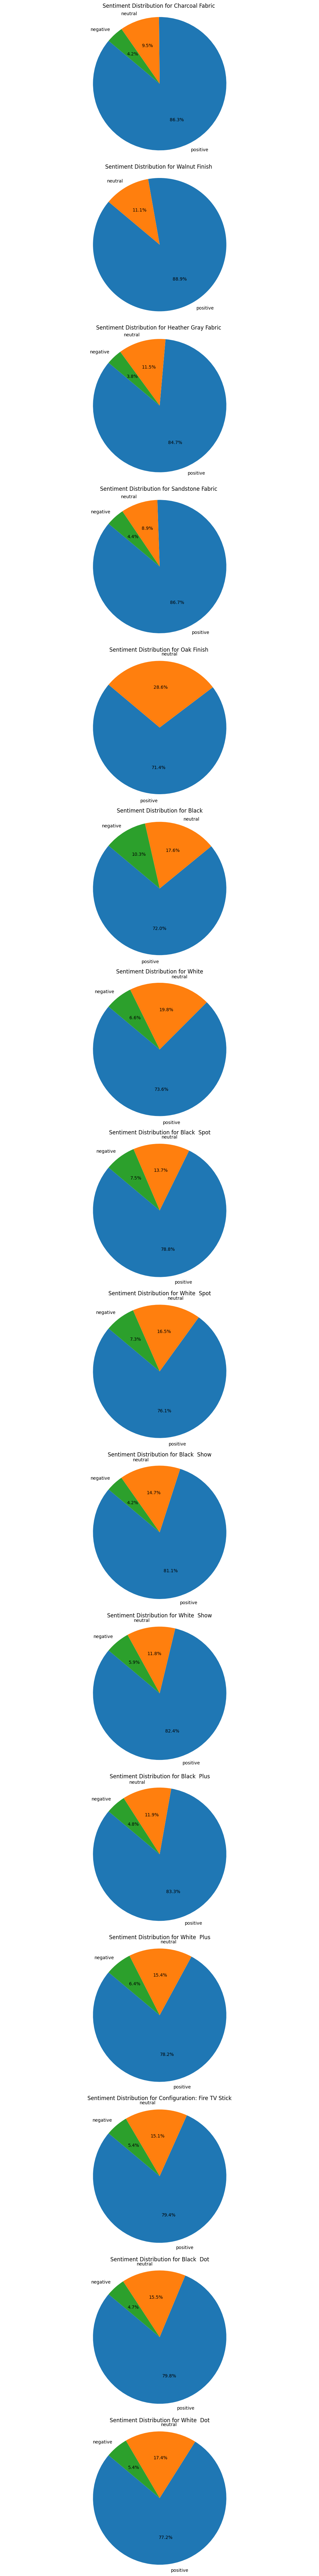

In [ ]:
variations = df['variation'].unique()

fig, axes = plt.subplots(len(variations), 1, figsize=(10, 5 * len(variations)))

for i, variation in enumerate(variations):
    var_df = df[df['variation'] == variation]
    sentiment_counts = var_df['sentiment'].value_counts()

    axes[i].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(f'Sentiment Distribution for {variation}')
    axes[i].axis('equal')

plt.tight_layout()
plt.show()
